<a href="https://colab.research.google.com/github/Tosinoladejo1/Binary_Classification_Project/blob/main/Gradient_descent_for_softmax_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt

#Using only NumPy, implement batch gradient descent for softmax regression. Train this classifier on the Iris dataset, demonstrating the process without relying on Scikit-learn.

## 1. Load the Iris data as provided in the notebook of the assignment. Add the bias term for every instance (x0 = 1).

In [2]:
from sklearn.datasets import load_iris
import numpy as np
iris = load_iris(as_frame=True)

load the data (take the petal length and petal width).

In [5]:
X = iris.data.iloc[:, 2:4]    # Use .iloc for integer-location based indexing
y = iris.target

add the bias term for every instance ($x_0 = 1$).

In [6]:
X_with_bias = np.hstack([np.ones((X.shape[0], 1)), X])

split the dataset into a training set, a validation set and a test set manually:

In [7]:
test_ratio = 0.2
validation_ratio = 0.2
total_size = len(X_with_bias)

test_size = int(total_size * test_ratio)
validation_size = int(total_size * validation_ratio)
train_size = total_size - test_size - validation_size

np.random.seed(42)
rnd_indices = np.random.permutation(total_size)

X_train = X_with_bias[rnd_indices[:train_size]]
y_train = y[rnd_indices[:train_size]]
X_valid = X_with_bias[rnd_indices[train_size:-test_size]]
y_valid = y[rnd_indices[train_size:-test_size]]
X_test = X_with_bias[rnd_indices[-test_size:]]
y_test = y[rnd_indices[-test_size:]]

## 2. The targets are class indices (0, 1 or 2). They have to turn to class probabilities to train the Softmax Regression model. Each instance must show a probability equal to 0.0 for all classes except for the target class (1.0) (so the class probability vectors should be a one-hot vector). Write a function to convert the vector of class indices to a matrix of one-hot vector for each instance.


In [13]:
def to_one_hot(y):
   num_classes = y.max() + 1  # Determine the number of classes from the data
   one_hot = np.zeros((y.shape[0], num_classes)) # Assuming num_classes is defined elsewhere
   for i, val in enumerate(y):
        one_hot[i, val] = 1  # Indent this line to be part of the for loop
   return one_hot

Check with the expected out put to make sure your code is doing the right thing:

In [14]:
y_train[:10]

73     1
18     0
118    2
78     1
76     1
31     0
64     1
141    2
68     1
82     1
Name: target, dtype: int64

In [15]:
to_one_hot(y_train[:10])

array([[0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.]])

In [16]:
Y_train_one_hot = to_one_hot(y_train)
Y_valid_one_hot = to_one_hot(y_valid)
Y_test_one_hot = to_one_hot(y_test)

## 3. Normalize the data using Z-Score Normalization and define the softmax function to be used later.

In [17]:
# fill the following lines
mean = np.mean(X_train[:, 1:], axis=0)
std =np.std(X_train[:, 1:], axis=0)
X_train[:, 1:] = (X_train[:, 1:] - mean) / std
X_valid[:, 1:] = (X_valid[:, 1:] - mean) / std
X_test[:, 1:] = (X_test[:, 1:] - mean) / std

In [18]:
def softmax(logits):
    exps = np.exp(logits - np.max(logits, axis=1, keepdims=True))
    exp_sums = np.sum(exps, axis=1, keepdims=True)
    return exps / exp_sums

In [19]:
n_inputs = X_train.shape[1]  # == 3 (2 features plus the bias term)
n_outputs = len(np.unique(y_train))  # == 3 (there are 3 iris classes)

In [20]:
n_inputs

3

## 4. Implement the gradient step using numpy. Make sure about the dimensions and the correctness of your calculations.

turn  the math equations into Python code.

So the equations we will need are the cost function:

$J(\mathbf{\Theta}) =
- \dfrac{1}{m}\sum\limits_{i=1}^{m}\sum\limits_{k=1}^{K}{y_k^{(i)}\log\left(\hat{p}_k^{(i)}\right)}$

And the equation for the gradients:

$\nabla_{\mathbf{\theta}^{(k)}} \, J(\mathbf{\Theta}) = \dfrac{1}{m} \sum\limits_{i=1}^{m}{ \left ( \hat{p}^{(i)}_k - y_k^{(i)} \right ) \mathbf{x}^{(i)}}$

Note that $\log\left(\hat{p}_k^{(i)}\right)$ may not be computable if $\hat{p}_k^{(i)} = 0$. So we will add a tiny value $\epsilon$ to $\log\left(\hat{p}_k^{(i)}\right)$ to avoid getting `nan` values.

In [33]:
def one_hot_encode(y, num_classes):
    one_hot = np.zeros((y.shape[0], num_classes))
    for i, val in enumerate(y):
        one_hot[i, val] = 1
    return one_hot

def compute_cost(X, y, theta):
    m = X.shape[0]  # Number of training examples
    logits = np.dot(X, theta)
    h = softmax(logits)
    cost = -np.sum(y * np.log(h + 1e-9)) / m
    return cost

def compute_gradient(X, y, theta):
    m = X.shape[0]  # Number of training examples
    logits = np.dot(X, theta)
    h = softmax(logits)
    gradient = np.dot(X.T, (h - y)) / m
    return gradient

num_classes = len(np.unique(y))
y_train_one_hot = one_hot_encode(y_train, num_classes)
y_valid_one_hot = one_hot_encode(y_valid, num_classes)
y_test_one_hot = one_hot_encode(y_test, num_classes)

eta = 0.5
n_epochs = 5001
m = len(X_train)
epsilon = 1e-5

np.random.seed(42)
Theta = np.random.randn(n_inputs, n_outputs)


# fill the following lines:
for epoch in range(n_epochs):
    logits = np.dot(X_train, Theta)  # Compute logits using training data
    Y_proba = softmax(logits)  # Compute probabilities using training data
    if epoch % 1000 == 0:
        logits_valid = np.dot(X_valid, Theta)  # Compute logits for validation set
        Y_proba_valid = softmax(logits_valid)
        xentropy_losses = -np.log(Y_proba_valid + epsilon) * y_valid_one_hot
        print(epoch, xentropy_losses.sum(axis=1).mean())
    error = Y_proba - y_train_one_hot
    gradients = np.dot(X_train.T, error) / m
    Theta = Theta - eta * gradients

0 3.7085808486476917
1000 0.14519367480830642
2000 0.13013095755040877
3000 0.12009639326384534
4000 0.11372961364786889
5000 0.11002459532472426


In [34]:
Theta

array([[ 0.41931626,  6.11112089, -5.52429876],
       [-6.53054533, -0.74608616,  8.33137102],
       [-5.28115784,  0.25152675,  6.90680425]])

In [35]:
logits = X_valid @ Theta
Y_proba = softmax(logits)
y_predict = Y_proba.argmax(axis=1)

accuracy_score = (y_predict == y_valid).mean()
accuracy_score

0.9333333333333333

## 5. Document and plot the results of your model.

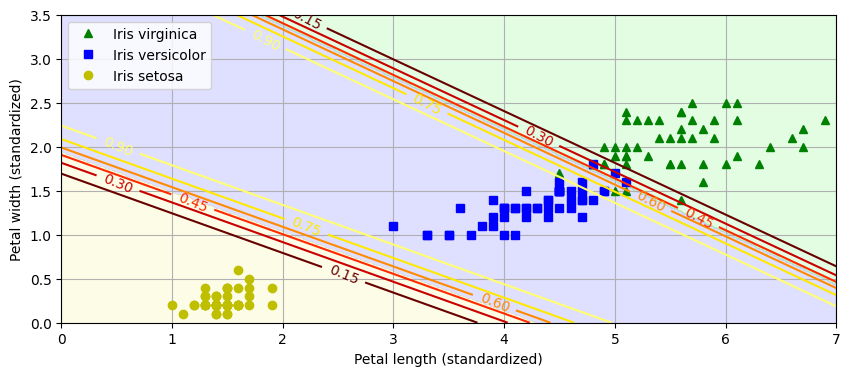

In [40]:
import matplotlib as mpl

custom_cmap = mpl.colors.ListedColormap(['#fafab0', '#9898ff', '#a0faa0'])

x0, x1 = np.meshgrid(np.linspace(0, 8, 500).reshape(-1, 1),
                     np.linspace(0, 3.5, 200).reshape(-1, 1))
X_new = np.c_[x0.ravel(), x1.ravel()]
X_new = (X_new - mean) / std
X_new_with_bias = np.c_[np.ones(len(X_new)), X_new]

logits = np.dot(X_new_with_bias, Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

zz1 = Y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

X_np = X.values
y_np = y.values

plt.figure(figsize=(10, 4))
plt.plot(X_np[y_np == 2, 0], X_np[y_np == 2, 1], "g^", label="Iris virginica")
plt.plot(X_np[y_np == 1, 0], X_np[y_np == 1, 1], "bs", label="Iris versicolor")
plt.plot(X_np[y_np == 0, 0], X_np[y_np == 0, 1], "yo", label="Iris setosa")

plt.contourf(x0, x1, zz, cmap=custom_cmap, alpha=0.3)
contour = plt.contour(x0, x1, zz1, cmap="hot")
plt.clabel(contour, inline=1)
plt.xlabel("Petal length (standardized)")
plt.ylabel("Petal width (standardized)")
plt.legend(loc="upper left")
plt.axis([0, 7, 0, 3.5])
plt.grid()
plt.show()